In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("india_housing_prices.csv")
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [3]:
df.shape

(250000, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [5]:
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


Price and Analysis

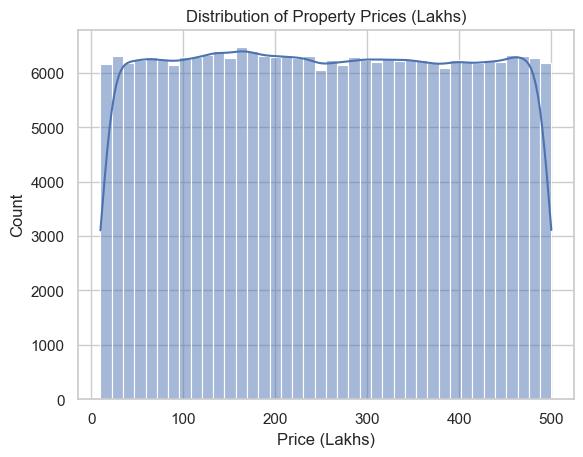

In [6]:
# Q1: Price distribution

plt.figure()
sns.histplot(df["Price_in_Lakhs"], bins=40, kde=True)
plt.title("Distribution of Property Prices (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

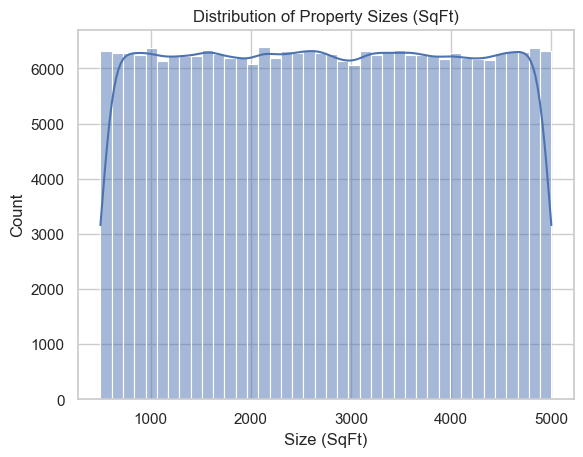

In [7]:
# Q2: Size distribution

plt.figure()
sns.histplot(df["Size_in_SqFt"], bins=40, kde=True)
plt.title("Distribution of Property Sizes (SqFt)")
plt.xlabel("Size (SqFt)")
plt.ylabel("Count")
plt.show()

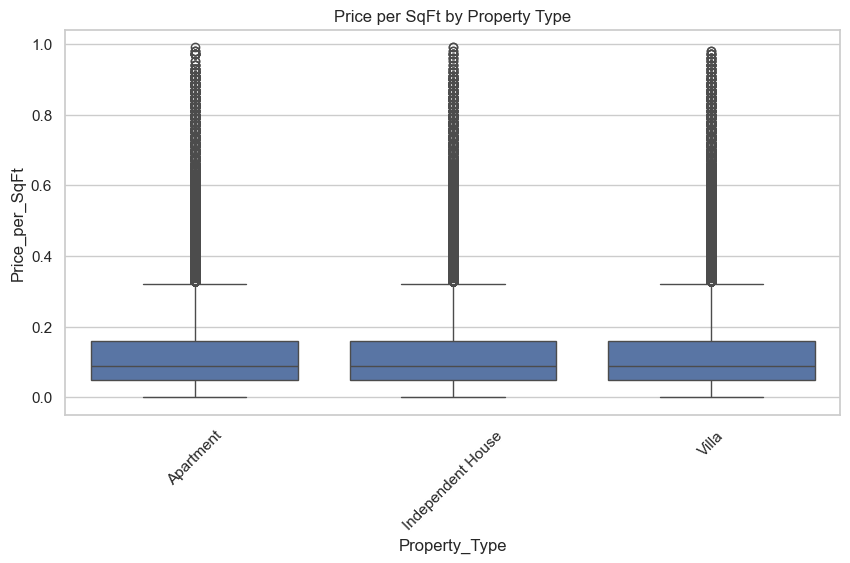

In [8]:
# Q3: Price per sq ft by property type

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Property_Type", y="Price_per_SqFt")
plt.title("Price per SqFt by Property Type")
plt.xticks(rotation=45)
plt.show()

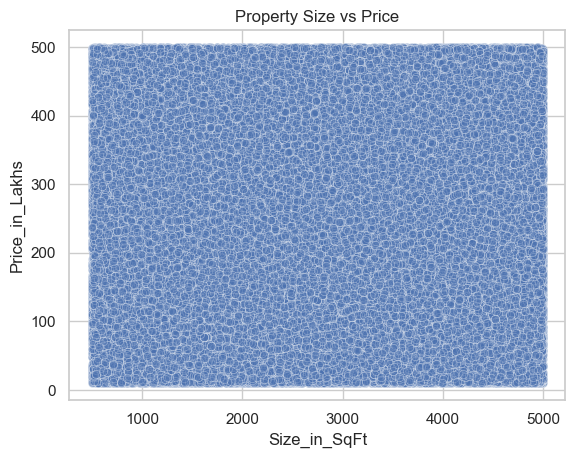

In [9]:
# Q4: Size vs Price

plt.figure()
sns.scatterplot(data=df, x="Size_in_SqFt", y="Price_in_Lakhs", alpha=0.4)
plt.title("Property Size vs Price")
plt.show()

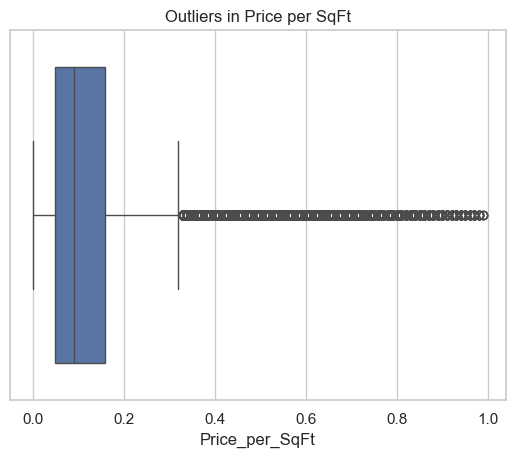

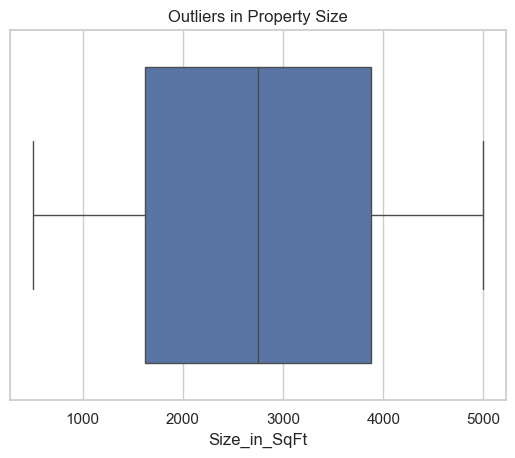

In [10]:
# Q5: Outliers

plt.figure()
sns.boxplot(x=df["Price_per_SqFt"])
plt.title("Outliers in Price per SqFt")
plt.show()

plt.figure()
sns.boxplot(x=df["Size_in_SqFt"])
plt.title("Outliers in Property Size")
plt.show()

Location Based

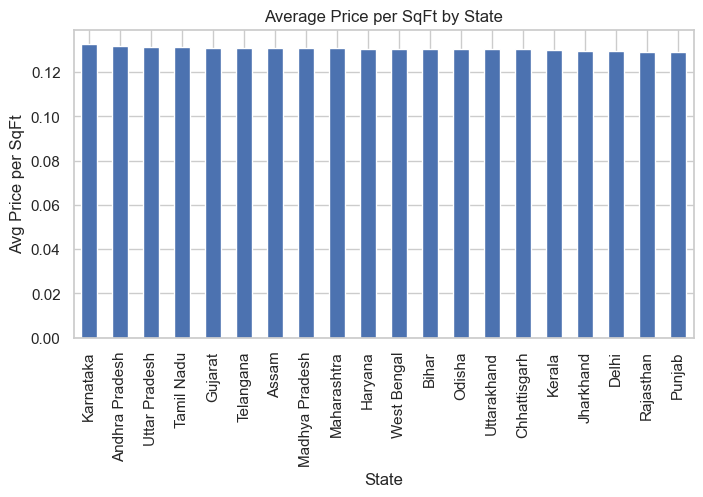

In [11]:
# Q6: Avg price per sq ft by state

state_pps = df.groupby("State")["Price_per_SqFt"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
state_pps.plot(kind="bar")
plt.title("Average Price per SqFt by State")
plt.ylabel("Avg Price per SqFt")
plt.show()

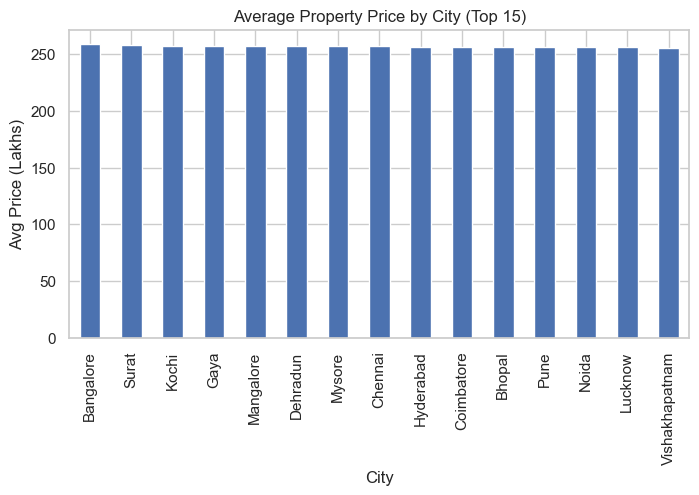

In [12]:
# Q7: Avg price by city

city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(8,4))
city_price.plot(kind="bar")
plt.title("Average Property Price by City (Top 15)")
plt.ylabel("Avg Price (Lakhs)")
plt.show()

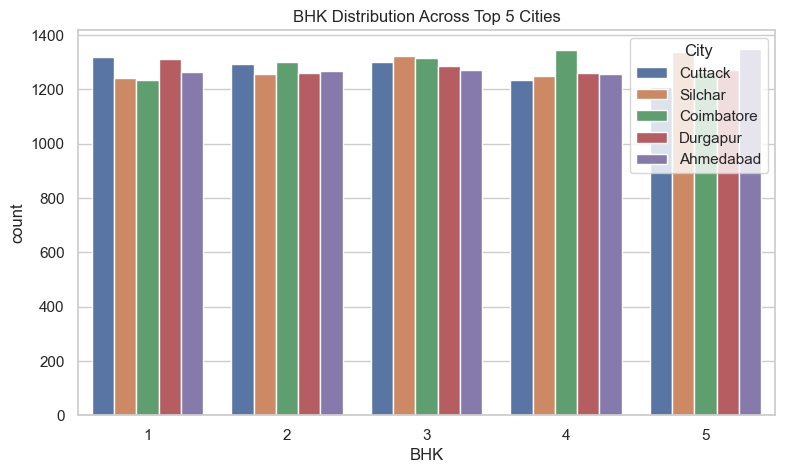

In [13]:
# Q9: BHK distribution across top 5 cities

top_cities = df["City"].value_counts().head(5).index
subset = df[df["City"].isin(top_cities)]

plt.figure(figsize=(9,5))
sns.countplot(data=subset, x="BHK", hue="City")
plt.title("BHK Distribution Across Top 5 Cities")
plt.show()

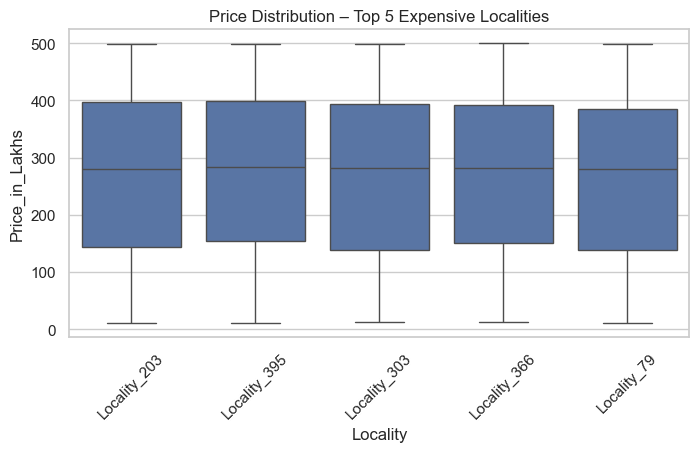

In [14]:
# Q10: Price distribution in top 5 expensive localities

top_localities = df.groupby("Locality")["Price_in_Lakhs"].median().sort_values(ascending=False).head(5).index
top_df = df[df["Locality"].isin(top_localities)]

plt.figure(figsize=(8,4))
sns.boxplot(data=top_df, x="Locality", y="Price_in_Lakhs")
plt.title("Price Distribution – Top 5 Expensive Localities")
plt.xticks(rotation=45)
plt.show()

Correlations & Relationships

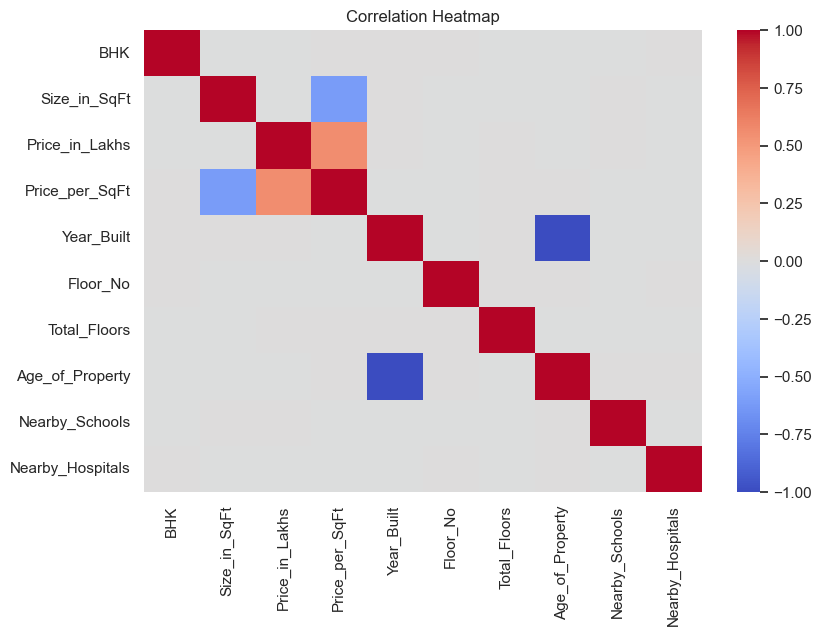

In [15]:
# Q11: correlation

numeric_cols = [
    "BHK","Size_in_SqFt","Price_in_Lakhs","Price_per_SqFt",
    "Year_Built","Floor_No","Total_Floors","Age_of_Property",
    "Nearby_Schools","Nearby_Hospitals"
]

plt.figure(figsize=(9,6))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

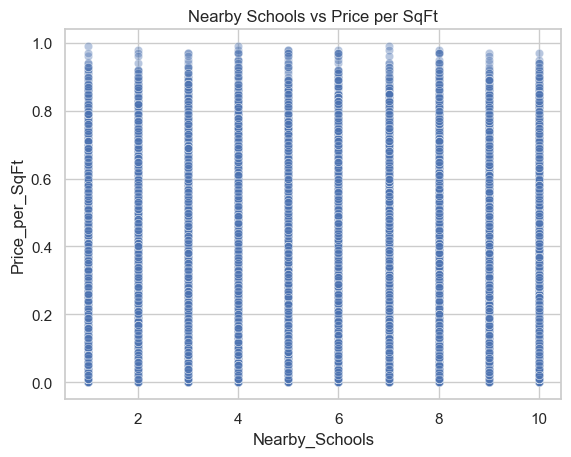

In [16]:
# Q12: Schools vs price per sqft

plt.figure()
sns.scatterplot(data=df, x="Nearby_Schools", y="Price_per_SqFt", alpha=0.4)
plt.title("Nearby Schools vs Price per SqFt")
plt.show()

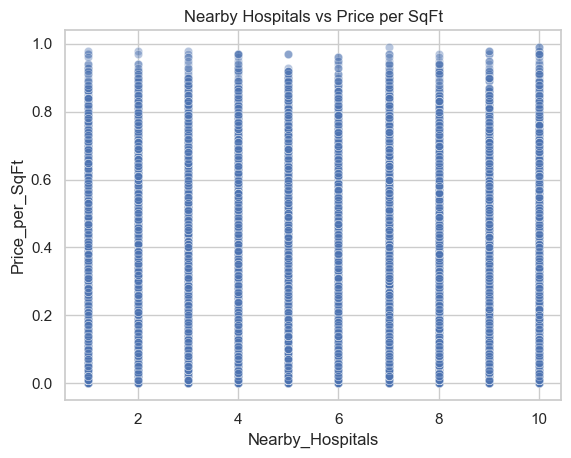

In [17]:
# Q13: Hospitals vs price per sqft

plt.figure()
sns.scatterplot(data=df, x="Nearby_Hospitals", y="Price_per_SqFt", alpha=0.4)
plt.title("Nearby Hospitals vs Price per SqFt")
plt.show()

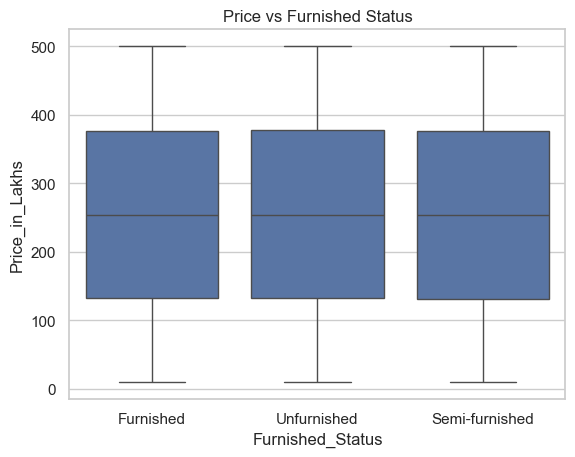

In [18]:
# Q14: Furnished vs price

plt.figure()
sns.boxplot(data=df, x="Furnished_Status", y="Price_in_Lakhs")
plt.title("Price vs Furnished Status")
plt.show()

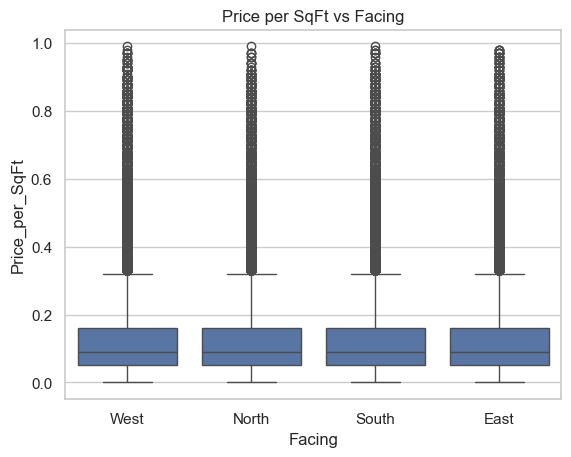

In [19]:
# Q15: Facing vs price per sqft

plt.figure()
sns.boxplot(data=df, x="Facing", y="Price_per_SqFt")
plt.title("Price per SqFt vs Facing")
plt.show()

Investment & Amenities

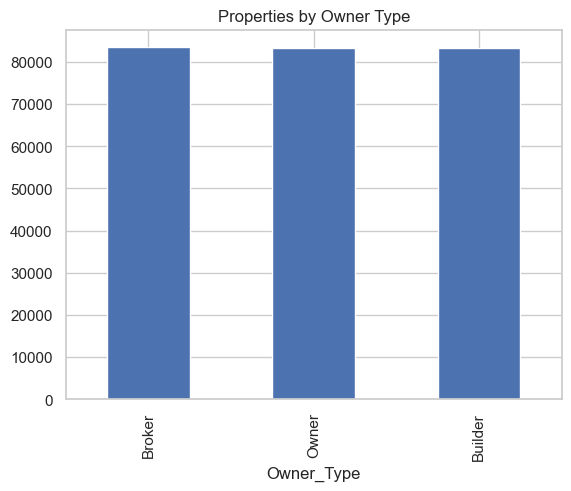

In [20]:
# Q16: Owner type counts

df["Owner_Type"].value_counts().plot(kind="bar")
plt.title("Properties by Owner Type")
plt.show()

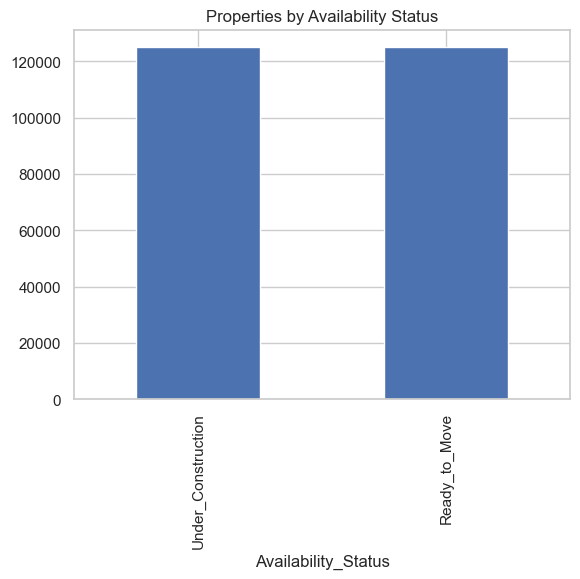

In [21]:
# Q17: Availability status

df["Availability_Status"].value_counts().plot(kind="bar")
plt.title("Properties by Availability Status")
plt.show()

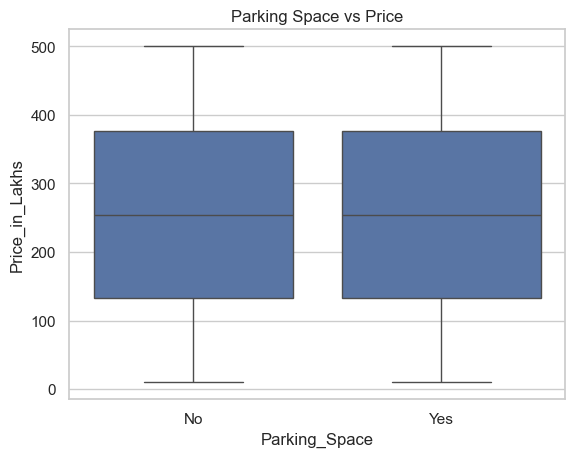

In [22]:
# Q18: Parking vs price

plt.figure()
sns.boxplot(data=df, x="Parking_Space", y="Price_in_Lakhs")
plt.title("Parking Space vs Price")
plt.show()

In [23]:
# Q19: Amenity count vs price per sqft (after preprocessing script this exists)

if "Amenity_Count" in df.columns:
    plt.figure()
    sns.scatterplot(data=df, x="Amenity_Count", y="Price_per_SqFt", alpha=0.4)
    plt.title("Amenity Count vs Price per SqFt")
    plt.show()

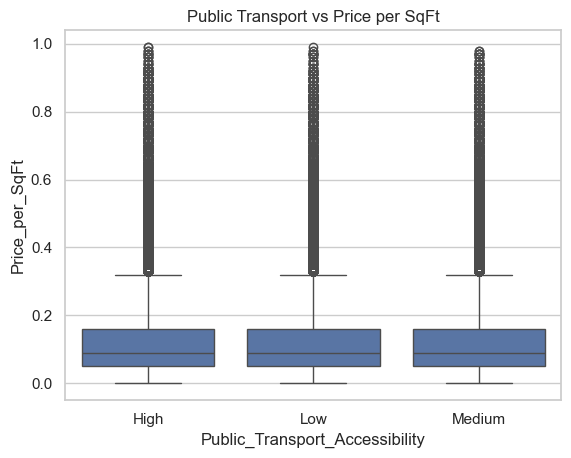

In [24]:
# Q20: Public transport vs price and investment

plt.figure()
sns.boxplot(data=df, x="Public_Transport_Accessibility", y="Price_per_SqFt")
plt.title("Public Transport vs Price per SqFt")
plt.show()

if "Good_Investment" in df.columns:
    plt.figure()
    sns.countplot(data=df, x="Public_Transport_Accessibility", hue="Good_Investment")
    plt.title("Public Transport vs Good Investment")
    plt.show()